In [132]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/corrected/X_2.npy
/kaggle/input/corrected/Y_2.npy
/kaggle/input/sign-language-digits-dataset/Y.npy
/kaggle/input/sign-language-digits-dataset/X.npy
/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/Y.npy
/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/X.npy


In [133]:
X = np.load('/kaggle/input/corrected/X_2.npy')
Y = np.load('/kaggle/input/corrected/Y_2.npy')

## Data Information

In [134]:
print('Size of X.npy:', X.shape)
print('Size of Y.npy:', Y.shape)


Size of X.npy: (2062, 64, 64)
Size of Y.npy: (2062, 10)


## Split each into training and test sets

In [135]:
from sklearn.model_selection import train_test_split
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, Y, test_size=0.20) 
X_TRAIN = X_TRAIN.reshape(1649,64,64,1)
X_TEST = X_TEST.reshape(413,64,64,1)

In [136]:
print('Size of X_TRAIN:', X_TRAIN.shape)
print('Size of Y_TRAIN:', Y_TRAIN.shape)
print('Size of X_TEST:', X_TEST.shape)
print('Size of Y_TEST:', Y_TEST.shape)

Size of X_TRAIN: (1649, 64, 64, 1)
Size of Y_TRAIN: (1649, 10)
Size of X_TEST: (413, 64, 64, 1)
Size of Y_TEST: (413, 10)


In [137]:
print('Preview:\n')
print('X:')
print(X_TRAIN[1])
print('\nY:')
print(Y_TRAIN[1])

Preview:

X:
[[[0.46666664]
  [0.45098037]
  [0.44313723]
  ...
  [0.54117644]
  [0.5490196 ]
  [0.5568627 ]]

 [[0.4588235 ]
  [0.4470588 ]
  [0.43137252]
  ...
  [0.5294118 ]
  [0.54117644]
  [0.5529412 ]]

 [[0.45490193]
  [0.4352941 ]
  [0.41960782]
  ...
  [0.517647  ]
  [0.5294118 ]
  [0.54509807]]

 ...

 [[0.5058824 ]
  [0.49411762]
  [0.48627448]
  ...
  [0.56078434]
  [0.5686275 ]
  [0.572549  ]]

 [[0.5137255 ]
  [0.5058824 ]
  [0.49411762]
  ...
  [0.5686275 ]
  [0.5686275 ]
  [0.5764706 ]]

 [[0.52549016]
  [0.517647  ]
  [0.5058824 ]
  ...
  [0.572549  ]
  [0.5764706 ]
  [0.58431375]]]

Y:
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


This image is classified as:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


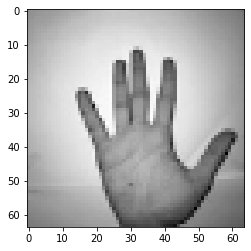

In [138]:
import matplotlib.pyplot as plt
from random import randrange
randomNumber = randrange(len(X_TRAIN))
plt.imshow(X_TRAIN[randomNumber,:,:,0], cmap=plt.cm.binary)
print("This image is classified as: ", Y_TRAIN[randomNumber])

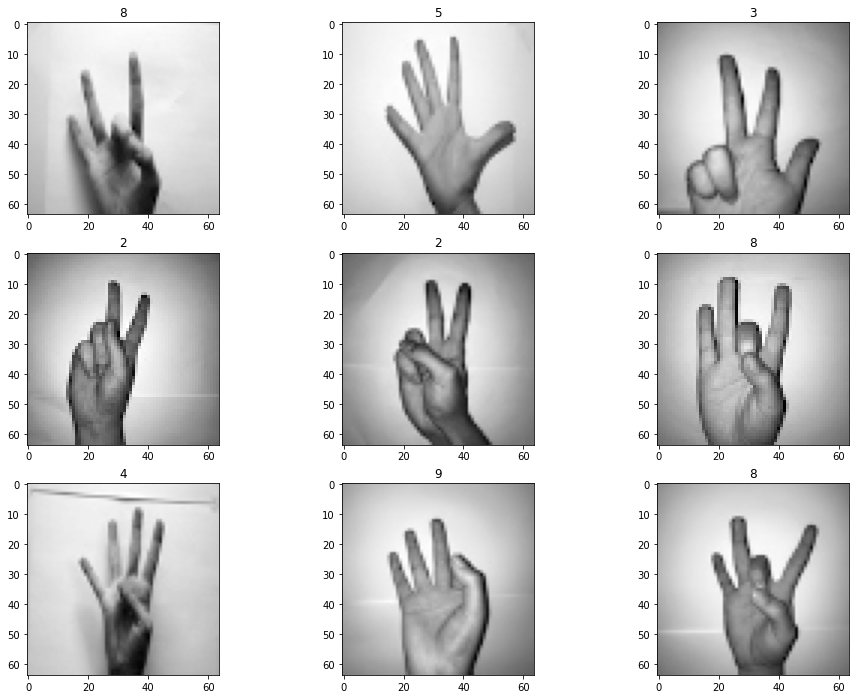

In [139]:
from random import randrange

randNumber = randrange(len(X_TRAIN)-9)
plt.figure(figsize=(16,12))
for i in range(9):
    j = randNumber + i
    plt.subplot(3,3, i+1)
    array = X_TRAIN[j,:,:,0]
    plt.imshow(array, cmap=plt.cm.binary)
    label=Y_TRAIN[j]
    plt.title(f'{np.argmax(label)}')
plt.show()

## Create Model

In [140]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(8, (3,3), activation='relu', input_shape=(64,64,1)))
model.add(layers.MaxPooling2D(2))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(16, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(128))
model.add(layers.Dense(64))


model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 8)         80        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 8)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 32)       

In [141]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])

In [142]:
batch_size = 32
epochs = 15
verbose=1
history1 = model.fit(X_TRAIN, Y_TRAIN, batch_size, epochs, validation_data=(X_TEST,Y_TEST))
score = model.evaluate(X_TEST, Y_TEST, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/15
52/52 [==============================] - 3s 52ms/step - loss: 2.1501 - accuracy: 0.2226 - val_loss: 1.6014 - val_accuracy: 0.4988
Epoch 2/15
52/52 [==============================] - 3s 48ms/step - loss: 1.1828 - accuracy: 0.5919 - val_loss: 0.8177 - val_accuracy: 0.7724
Epoch 3/15
52/52 [==============================] - 3s 50ms/step - loss: 0.7791 - accuracy: 0.7441 - val_loss: 0.6641 - val_accuracy: 0.8160
Epoch 4/15
52/52 [==============================] - 3s 49ms/step - loss: 0.5924 - accuracy: 0.8217 - val_loss: 0.5548 - val_accuracy: 0.8571
Epoch 5/15
52/52 [==============================] - 3s 48ms/step - loss: 0.4895 - accuracy: 0.8490 - val_loss: 0.4729 - val_accuracy: 0.8717
Epoch 6/15
52/52 [==============================] - 3s 49ms/step - loss: 0.4366 - accuracy: 0.8599 - val_loss: 0.4503 - val_accuracy: 0.8692
Epoch 7/15
52/52 [==============================] - 3s 49ms/step - loss: 0.3689 - accuracy: 0.8775 - val_loss: 0.3514 - val_accuracy: 0.8935
Epoch 8/15
52

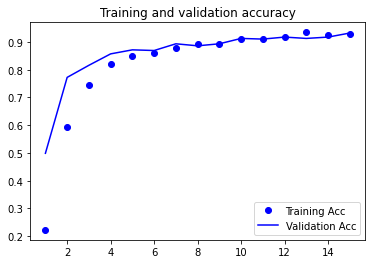

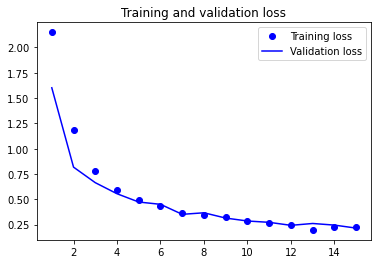

In [143]:
import matplotlib.pyplot as plt

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']


epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## With Data Augmentation

First, we must merge the two pandas dataframes X, and Y. Remember, X contains the numpy array for each image, and Y contains the One Hot encoded label. 

In [144]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    shear_range=0,
    zoom_range=0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
)

In [145]:
datagen.fit(X_TRAIN)

In [153]:
from keras.backend import clear_session

clear_session()

model2 = models.Sequential()
model2.add(layers.Conv2D(8, (3,3), activation='relu', input_shape=(64,64,1)))
model2.add(layers.MaxPooling2D(2))
model2.add(layers.Dropout(0.3))

model2.add(layers.Conv2D(16, (3,3), activation='relu'))
model2.add(layers.MaxPooling2D(2))
model2.add(layers.Dropout(0.3))
model2.add(layers.Conv2D(32, (3,3), activation='relu'))
model2.add(layers.MaxPooling2D(2))
model2.add(layers.Dropout(0.3))
model2.add(layers.Flatten())
model2.add(layers.Dense(128))
model2.add(layers.Dense(64))


model2.add(layers.Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])

model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        4

In [154]:
history2 = model2.fit(datagen.flow(X_TRAIN, Y_TRAIN, batch_size=32),
          epochs=30, validation_data=(X_TEST,Y_TEST))
score = model2.evaluate(X_TEST, Y_TEST, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/30
52/52 [==============================] - 3s 56ms/step - loss: 2.3052 - accuracy: 0.1116 - val_loss: 2.2938 - val_accuracy: 0.0920
Epoch 2/30
52/52 [==============================] - 3s 52ms/step - loss: 2.2469 - accuracy: 0.1595 - val_loss: 2.0212 - val_accuracy: 0.2857
Epoch 3/30
52/52 [==============================] - 3s 50ms/step - loss: 2.0988 - accuracy: 0.2323 - val_loss: 1.7359 - val_accuracy: 0.4092
Epoch 4/30
52/52 [==============================] - 3s 54ms/step - loss: 1.9427 - accuracy: 0.3044 - val_loss: 1.3131 - val_accuracy: 0.6707
Epoch 5/30
52/52 [==============================] - 3s 58ms/step - loss: 1.7544 - accuracy: 0.3669 - val_loss: 1.1381 - val_accuracy: 0.6610
Epoch 6/30
52/52 [==============================] - 3s 53ms/step - loss: 1.6063 - accuracy: 0.4251 - val_loss: 0.9519 - val_accuracy: 0.7821
Epoch 7/30
52/52 [==============================] - 3s 51ms/step - loss: 1.5780 - accuracy: 0.4372 - val_loss: 0.9904 - val_accuracy: 0.7143
Epoch 8/30
52

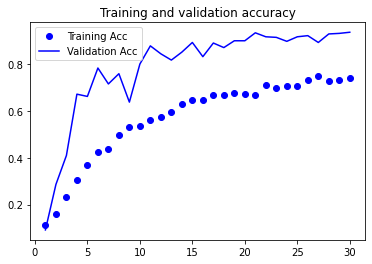

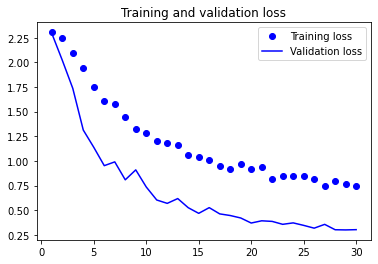

In [155]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']


epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Since Validation Acc > Training Acc, try to implement KFold